## Estadistica Aplicada 

Sesion 16 - 24 octubre 

Ana Sofia Saucedo Garcia
1946646

Grupo 42

In [1]:
# Librerias basicas

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
## especializadas 

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict

from statsmodels.tsa.arima.model import ARIMA

## pmdarima

import pmdarima as pm 




In [8]:
# datos

df_amazon= pd.read_excel('amazon (1).xlsx')

In [9]:
df_amazon

,fecha,amazon
0,2015-01-02,24.573591
1,2015-01-05,23.830631
2,2015-01-06,24.070295
3,2015-01-07,24.453760
4,2015-01-08,24.301968
...,...,...
1250,2019-12-23,52.589653
1251,2019-12-24,52.599163
1252,2019-12-26,52.561153
1253,2019-12-27,52.865196


In [10]:
df_amazon.dtypes

fecha     datetime64[ns]
amazon           float64
dtype: object

In [11]:
ultima_obs= df_amazon.loc[1254]
df_amazon=df_amazon.loc[:1253]

In [12]:
df_amazon

,fecha,amazon
0,2015-01-02,24.573591
1,2015-01-05,23.830631
2,2015-01-06,24.070295
3,2015-01-07,24.453760
4,2015-01-08,24.301968
...,...,...
1249,2019-12-20,54.128864
1250,2019-12-23,52.589653
1251,2019-12-24,52.599163
1252,2019-12-26,52.561153


In [13]:
ultima_obs

fecha     2019-12-30 00:00:00
amazon              51.478008
Name: 1254, dtype: object

In [14]:
df_amazon=df_amazon.set_index('fecha')

In [15]:
df_amazon.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-26', '2019-12-27'],
              dtype='datetime64[ns]', name='fecha', length=1254, freq=None)

In [16]:
# Informacion  los dias habiles (bussiness days)
## asignar frecuencia dias habiles 

df_amazon= df_amazon.asfreq('B')

In [17]:
df_amazon.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27'],
              dtype='datetime64[ns]', name='fecha', length=1301, freq='B')

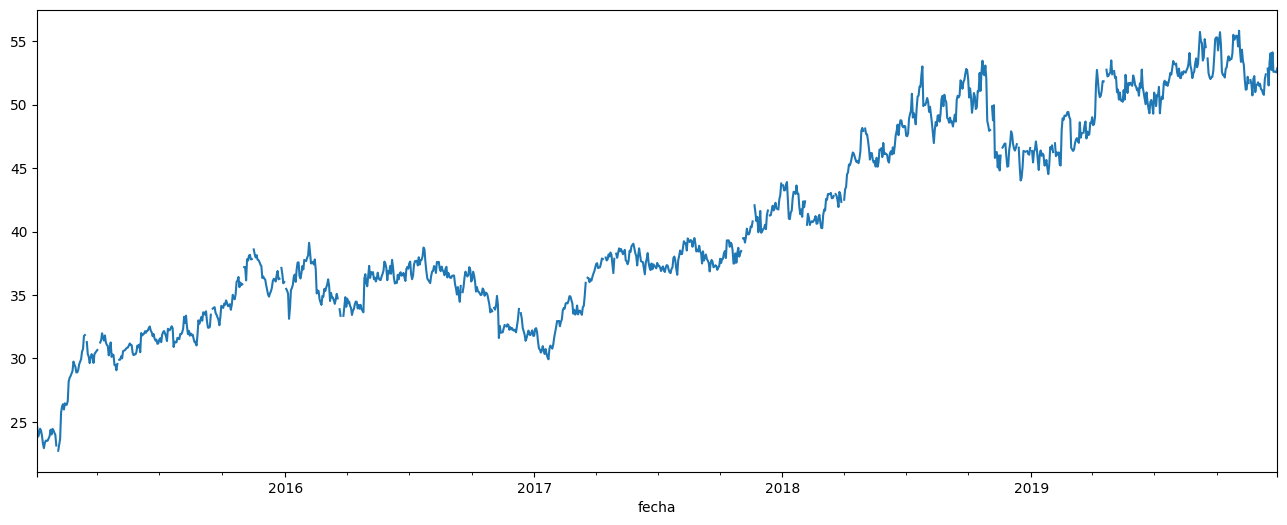

In [18]:
## Graficar

df_amazon['amazon'].plot(figsize=(16,6));

No es estacionaria porque se comporta como caminata aleatoria 

In [19]:
df_amazon['amazon'].isnull().sum()

47

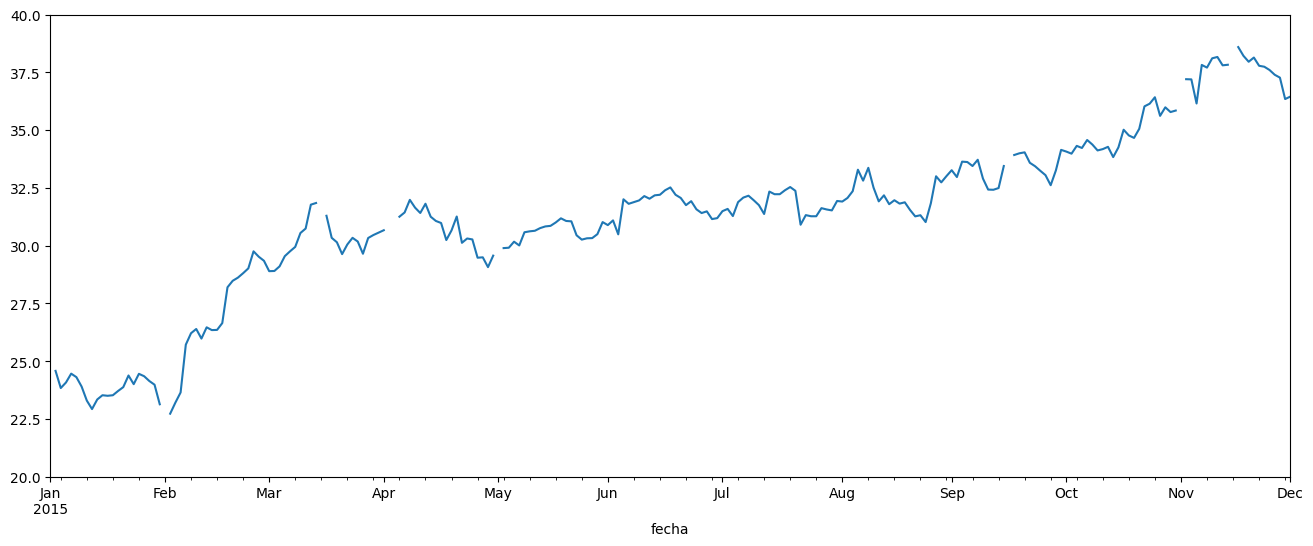

In [20]:
#graficar
df_amazon['amazon'].plot(figsize=(16,6));
plt.xlim('2015-01-01','2015-12-01')
plt.ylim(20,40);

In [21]:
df_amazon['amazon'].isnull().sum()

47

In [22]:
## Imputar con el ultimo valor conocido

df_amazon['amazon']=df_amazon['amazon'].fillna(method='pad')

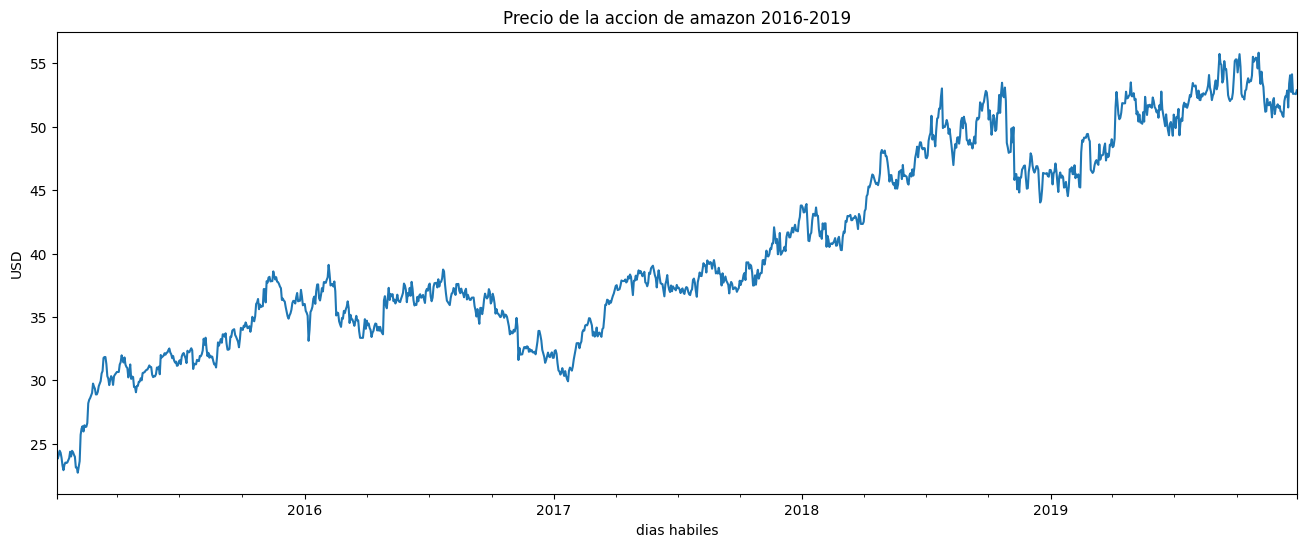

In [26]:
#graficar
df_amazon['amazon'].plot(figsize=(16,6));
plt.title('Precio de la accion de amazon 2016-2019')
plt.ylabel('USD')
plt.xlabel('dias habiles');

In [27]:
## prueba de dickey fuller

prueba_adf= adfuller(df_amazon['amazon'])
pvalue= prueba_adf[1]
pvalue.round(2)

0.52

No rechazamos $H_0$ , el precio de la accion de amazon es una serie no estacionaria

In [28]:
## aplicar primeras diferencias

df_amazon['amazon_diff']=df_amazon.diff()

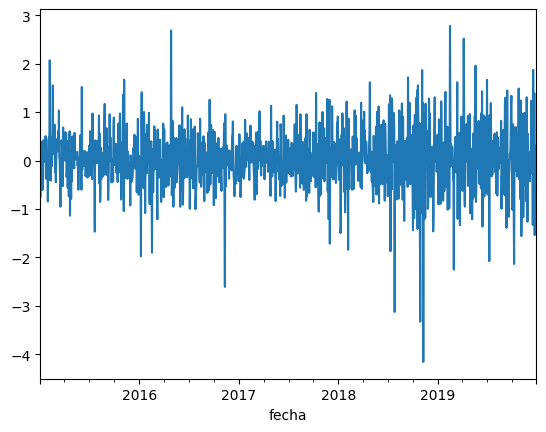

In [32]:
df_amazon['amazon_diff'].plot();

In [33]:
prueba_adf1= adfuller(df_amazon['amazon_diff'].dropna())
pvalue1= prueba_adf1[1]
pvalue1.round(2)

0.0

Rechazamos $H_0$ , significa que las primeras diferencias de amazon son una serie estacionaria 

* Amazon Integrada I(1)= ARIMA(p,1,q)
* 1 ras diferencias de amazon I(0)= ARIMA(p,0,q)

<function matplotlib.pyplot.show(close=None, block=None)>

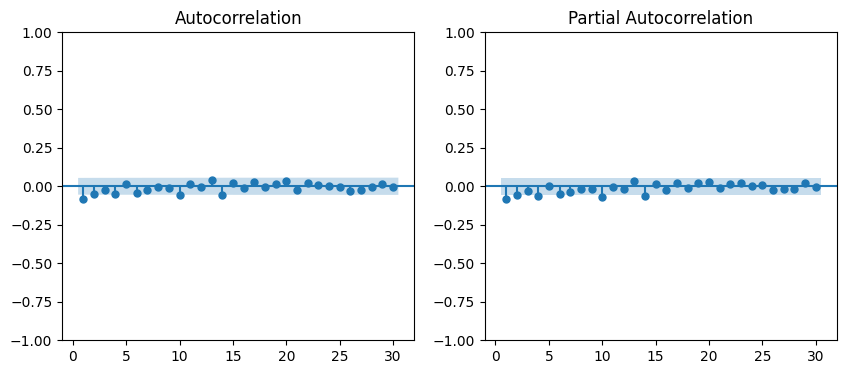

In [39]:
## correlacion 
ig,ax = plt.subplots(1,2, figsize=(10,4))

# graf1
plot_acf(df_amazon['amazon_diff'].dropna(),zero=False,lags=30,ax=ax[0])

#graf2
plot_pacf(df_amazon['amazon_diff'].dropna(),zero=False,lags=30,ax=ax[1])

plt.show


In [40]:
# Encontrar el orden del ARIMA 

pm.auto_arima(df_amazon['amazon'],
              start_p=1,start_q=1,
              max_p=7,max_q=7,
              ic='aic',
              seasonal=False)

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

amazon es un ARIMA(p=1,1,q=1)= ARIMA(1,1,1)

In [41]:
pm.auto_arima(df_amazon['amazon_diff'].dropna(),
              start_p=1,start_q=1,
              max_p=7,max_q=7,
              ic='aic',
              seasonal=False)

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

1 ras diferencias de amazon ARIMA(1,0,1)


In [42]:
## pronosticar la accion de amazon 

model= ARIMA(df_amazon['amazon'],
             order=(1,1,1))

results=model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 amazon   No. Observations:                 1301
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1183.529
Date:                Tue, 24 Oct 2023   AIC                           2373.058
Time:                        15:11:08   BIC                           2388.569
Sample:                    01-02-2015   HQIC                          2378.878
                         - 12-27-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7500      0.071     10.517      0.000       0.610       0.890
ma.L1         -0.8375      0.059    -14.285      0.000      -0.952      -0.723
sigma2         0.3616      0.008     43.599      0.0

In [45]:
results.predict('2019-12-28','2020-01-05')

2019-12-30    52.847340
2019-12-31    52.833947
2020-01-01    52.823902
2020-01-02    52.816367
2020-01-03    52.810716
2020-01-06    52.806477
Freq: B, Name: predicted_mean, dtype: float64

In [43]:
df_amazon.tail()

,amazon,amazon_diff
fecha,,
2019-12-23,52.589653,-1.539211
2019-12-24,52.599163,0.009510
2019-12-25,52.599163,0.000000
2019-12-26,52.561153,-0.038010
2019-12-27,52.865196,0.304043


In [48]:
forecast= results.get_forecast(steps=6)
forecast_mean= forecast.predicted_mean
forecast_ci= forecast.conf_int()

In [49]:
inicio= '2019-12-30'
final= '2020-01-06'

In [50]:
pronostico_valor= forecast_mean[inicio:final]
pronostico_intervalos= forecast_ci.loc[inicio:final]

In [51]:
pronostico_intervalos

,lower amazon,upper amazon
2019-12-30,51.668690,54.025990
2019-12-31,51.238282,54.429612
2020-01-01,50.941672,54.706131
2020-01-02,50.712311,54.920423
2020-01-03,50.523483,55.097949
2020-01-06,50.361404,55.251551


In [53]:
df_pronostico= pd.DataFrame({
    'pronostico':pronostico_valor,
    'limite inferior': pronostico_intervalos.iloc[:,0],
    'limite superior':pronostico_intervalos.iloc[:,1]
})

In [54]:
df_pronostico.head(1)['pronostico']

2019-12-30    52.84734
Freq: B, Name: pronostico, dtype: float64

In [62]:
print(f'el pronostico de la accion de Amazon es {df_pronostico.iloc[0,0].round(2)}\n con un valor minimo de {df_pronostico.iloc[0,1].round(2)}\n con un valor maximo de {df_pronostico.iloc[0,2].round(2)}')

el pronostico de la accion de Amazon es 52.85
 con un valor minimo de 51.67
 con un valor maximo de 54.03


In [63]:
ultima_obs

fecha     2019-12-30 00:00:00
amazon              51.478008
Name: 1254, dtype: object